### **금융 시장의 수익률 (Finacial Market Return)**
- 일반적으로 금융 시장을 분석하거나 머신러닝 모델을 구축할 때 price가 아닌 return을 활용하는 경우가 많다.
- 수익률을 통해 복리계산과 연율화(1년간의 성장률)등을 위해 무수히 많은 반복 계산을 하게 되므로
  (1 + return)으로 계산할 경우 복잡하고 번거로워진다.
- 기존 return에 log를 취해주면, 더 편한 계산이 가능해지지만 당연히 약간의 오차는 발생하게 된다.
- 약간의 오차를 감수하고 로그를 사용함으로써 얻는 이득이 훨씬 많고,  
  국내 주식에서의 상한선과 하한선은 -30% ~ 30% 제약까지 있기 때문에 일반적인 주가 움직임에 대해 오차가 극히 적다.
- 즉, `로그를 취하는 것은 정밀성보다 편의성을 높인 것`으로 이해하면 된다.
- 수익률 단위가 분, 초, 밀리초 이하로 내려가야 정밀성에 차이가 많이 발생하지만,  
  실제 금융시장에서는 최소 하루 단위 이상으로 계산하기 때문에 오차가 거의 발생하지 않게된다.
- 또한, return에 로그를 취하면 우측으로 치우친 확률 분포를 중심으로 재조정해주는 효과까지 있기 때문에 안쓸이유가 없다.


<img src='./images/log_return.png' width='700px'>

In [1]:
import yfinance as yf

# VIX는 투자자들이 향후 30일간 S&P 500지수가 얼마나 변동할 것인지를 반영한 지수이다.
# 투자자들이 투자 결정을 내리기 전에 시장 리스크, 공포(코로나같은) 및 스트레스를 측정하는데 사용한다.
columns = ['AAPL', 'MSFT', 'INTC', 'AMZN', 'GS',
           'SPY', '^SPX', '^VIX', 'EURUSD=X', '^XAU', 'GDX', 'GLD']

# 소수점 4째자리의 시계열 데이터 프레임으로 변환
f_df = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
f_df

[*********************100%%**********************]  12 of 12 completed


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,6.4620,6.6950,1.4424,42.1804,109.80,134.7607,13.6605,23.3894,86.8600,1132.9900,20.04,174.020
2010-01-05,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.5200,19.35,176.020
2010-01-06,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.1400,19.16,180.760
2010-01-07,6.3584,6.5000,1.4318,43.4093,110.82,138.3344,13.4773,23.0115,87.5192,1141.6899,19.06,179.210
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-06,194.4800,185.0000,1.0875,36.0100,219.43,458.1000,30.4200,424.5200,534.6600,5352.9600,12.58,145.380
2024-06-07,196.8900,184.3000,1.0894,33.5400,211.60,454.9100,30.7400,423.8500,534.0100,5346.9902,12.22,136.200
2024-06-10,193.1200,187.0600,1.0779,34.0300,213.54,453.5500,30.9100,427.8700,535.6600,5360.7900,12.74,138.180


In [2]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3769 entries, 2010-01-01 to 2024-06-12
Freq: B
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AAPL      3634 non-null   float64
 1   AMZN      3634 non-null   float64
 2   EURUSD=X  3763 non-null   float64
 3   GDX       3634 non-null   float64
 4   GLD       3634 non-null   float64
 5   GS        3634 non-null   float64
 6   INTC      3634 non-null   float64
 7   MSFT      3634 non-null   float64
 8   SPY       3634 non-null   float64
 9   ^SPX      3634 non-null   float64
 10  ^VIX      3634 non-null   float64
 11  ^XAU      3634 non-null   float64
dtypes: float64(12)
memory usage: 382.8 KB


In [3]:
# 날짜 피처를 인덱스로 쓰고싶을 때

# 인덱스를 원하는 컬럼으로 변경한 뒤, DatetimeIndex로 변환
# pd.read_csv('path', index_col='날짜 컬럼명', parse_dates=True)

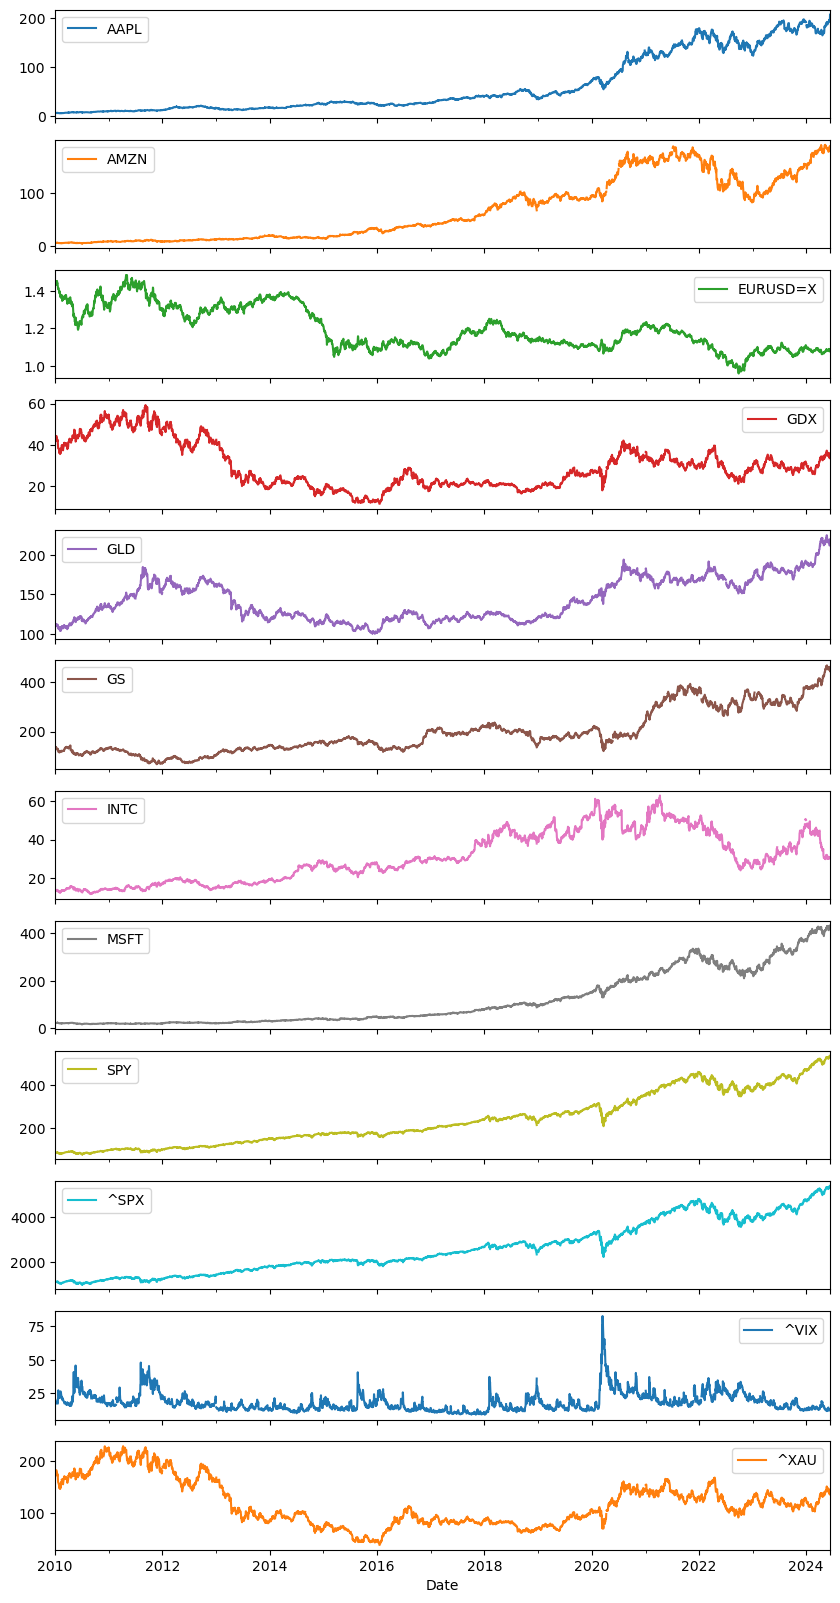

In [4]:
import matplotlib.pyplot as plt

# 각 변수의 데이터를 개별적으로 시각화
f_df.plot(figsize=(10, 20), subplots=True)
plt.show()

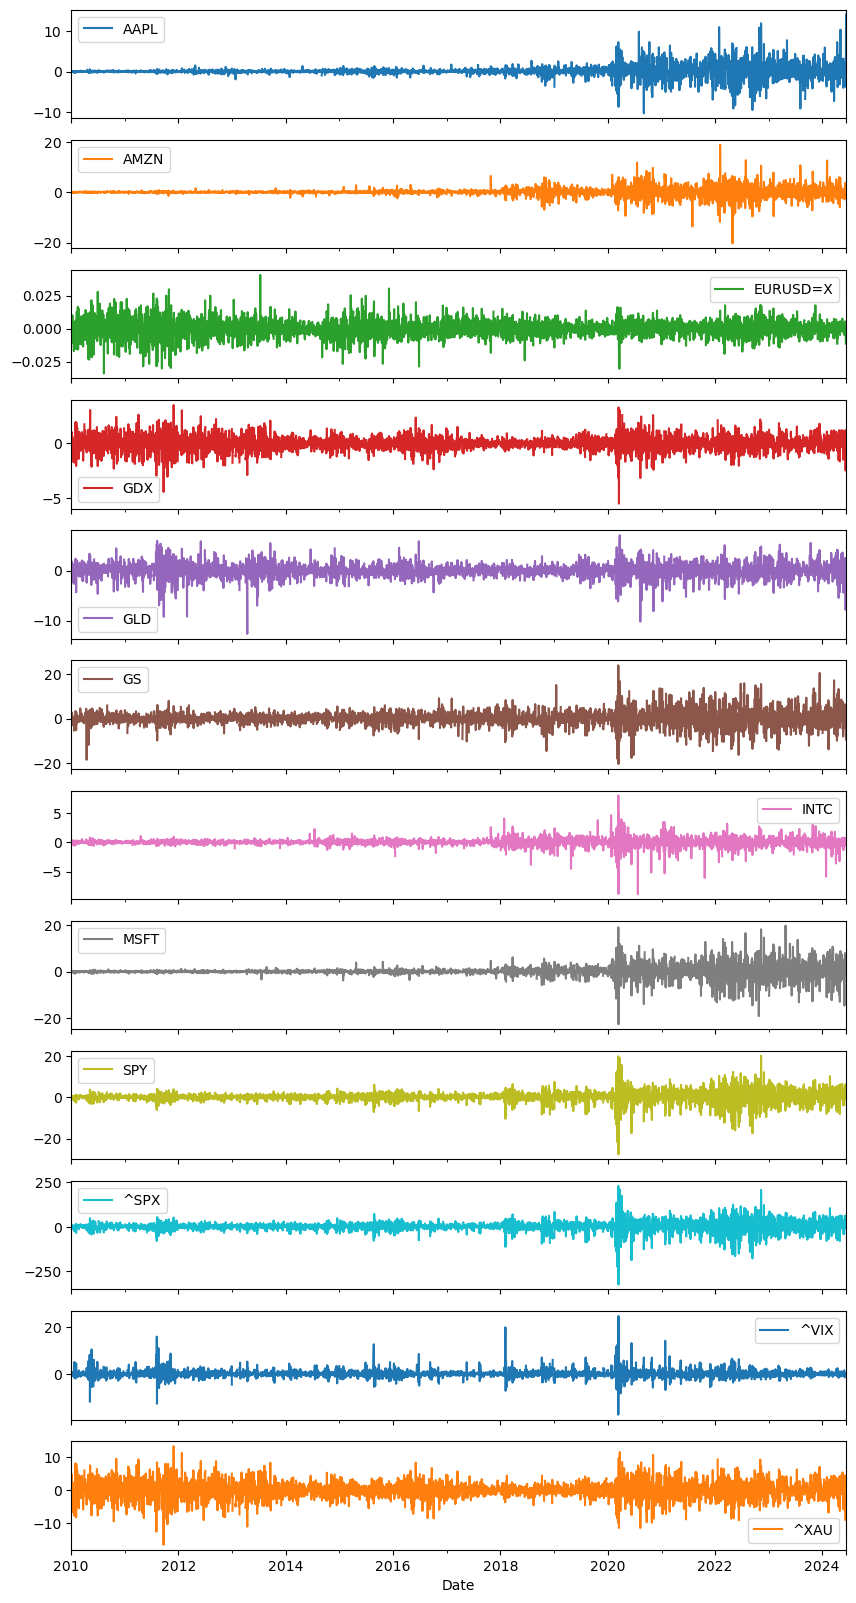

In [5]:
import matplotlib.pyplot as plt

# 차분 하기
# 높고 낮음이 심할수록 변동이 많은것
f_df.diff().plot(figsize=(10, 20), subplots=True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10868\598335965.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  f_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))


<Axes: xlabel='Ticker'>

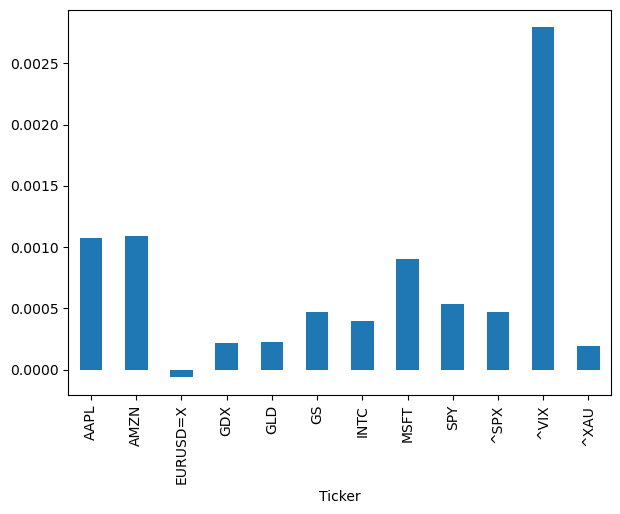

In [6]:
# 변화율(변동율)을 나타낸 바그래프
f_df.pct_change().mean().plot(kind='bar', figsize=(7, 5))
# ^VIX는 기본적으로 변동율이 높다.

In [7]:
# 수익률 계산하기

# 데이터 프레임 한 칸 아래로 이동, 첫번째 행은 NaN으로 채워짐
display(f_df.shift(1).head(4))
# 원본 데이터 프레임
display(f_df.head(4))
# 데이터 프레임 한 칸 위로 이동, 마지막 행 NaN 값으로 채워짐
display(f_df.shift(-1).head(4))

Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.4620,6.6950,1.4424,42.1804,109.8,134.7607,13.6605,23.3894,86.86,1132.99,20.04,174.02
2010-01-06,6.4731,6.7345,1.4366,42.5871,109.7,137.1432,13.6539,23.3970,87.09,1136.52,19.35,176.02


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,6.4620,6.6950,1.4424,42.1804,109.80,134.7607,13.6605,23.3894,86.8600,1132.99,20.04,174.02
2010-01-05,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.52,19.35,176.02
2010-01-06,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.14,19.16,180.76


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,6.4620,6.6950,1.4424,42.1804,109.80,134.7607,13.6605,23.3894,86.8600,1132.9900,20.04,174.02
2010-01-04,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.5200,19.35,176.02
2010-01-05,6.3702,6.6125,1.4404,43.6215,111.51,135.6794,13.6081,23.2534,87.1513,1137.1400,19.16,180.76
2010-01-06,6.3584,6.5000,1.4318,43.4093,110.82,138.3344,13.4773,23.0115,87.5192,1141.6899,19.06,179.21


In [8]:
# 금융시장에서는 shift(이동)가 중요하다.

In [9]:
import numpy as np

# 수익률
# f_df / f_df.shift(1)

# 로그를 취한다. 이게 실무에서 사용하는 데이터.
rate_f_df = np.log(f_df / f_df.shift(1))
rate_f_df

Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,0.002360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001716,0.005883,-0.004029,0.009596,-0.000911,0.017525,-0.000483,0.000325,0.002644,0.003111,-0.035038,0.011427
2010-01-06,-0.016024,-0.018282,0.002642,0.023999,0.016365,-0.010731,-0.003360,-0.006156,0.000704,0.000545,-0.009868,0.026573
2010-01-07,-0.001854,-0.017160,-0.005988,-0.004876,-0.006207,0.019379,-0.009658,-0.010457,0.004213,0.003993,-0.005233,-0.008612
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-06,-0.007122,0.020313,-0.000643,0.034467,0.007364,-0.007785,-0.011765,0.001202,-0.000019,-0.000200,-0.003967,0.031798
2024-06-07,0.012316,-0.003791,0.001746,-0.071058,-0.036336,-0.006988,0.010464,-0.001579,-0.001216,-0.001116,-0.029034,-0.065227
2024-06-10,-0.019333,0.014865,-0.010612,0.014504,0.009126,-0.002994,0.005515,0.009440,0.003085,0.002578,0.041673,0.014433


<Axes: xlabel='Date'>

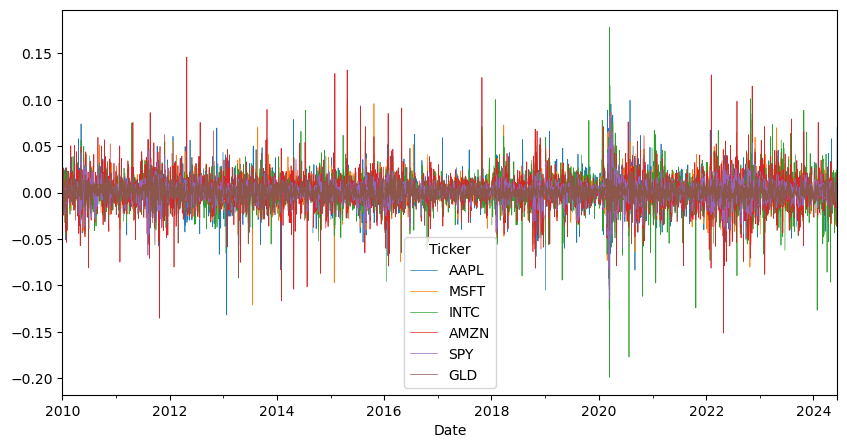

In [10]:
rate_f_df[['AAPL', 'MSFT', 'INTC', 'AMZN', 'SPY', 'GLD']].plot(figsize=(10, 5), lw=0.5)

In [11]:
# 연율화

# 연간영업일을 약 252일로 계산한다.
# 피처별 평균을 낸거에 252를 곱한다.
rate_f_df.mean() * 252

Ticker
AAPL        0.236620
AMZN        0.201643
EURUSD=X   -0.020283
GDX        -0.013669
GLD         0.039135
GS          0.094567
INTC        0.053514
MSFT        0.197852
SPY         0.128720
^SPX        0.110978
^VIX       -0.344346
^XAU       -0.014741
dtype: float64

In [12]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중 공산성 평가 지표 VIF 함수 선언
def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [13]:
# 다변량이기 때문에 공변량 함수를 사용하여 연관성을 볼 수 있다.
# 금융에서는 투자 수익률이나 가격 변동을 분석할 때 연율화를 진행한다.
rate_f_df = rate_f_df.dropna()
get_vif(rate_f_df)

,vif_score,feature
0,2.003985,AAPL
1,1.688428,AMZN
2,1.005265,EURUSD=X
3,23.015022,GDX
4,2.392763,GLD
5,2.326582,GS
6,1.759423,INTC
7,2.626579,MSFT
8,402.747717,SPY
9,401.705607,^SPX


In [14]:
# 로그를 취함은 편의성을 위해서
# 결론 : 수익률을 구하는 것

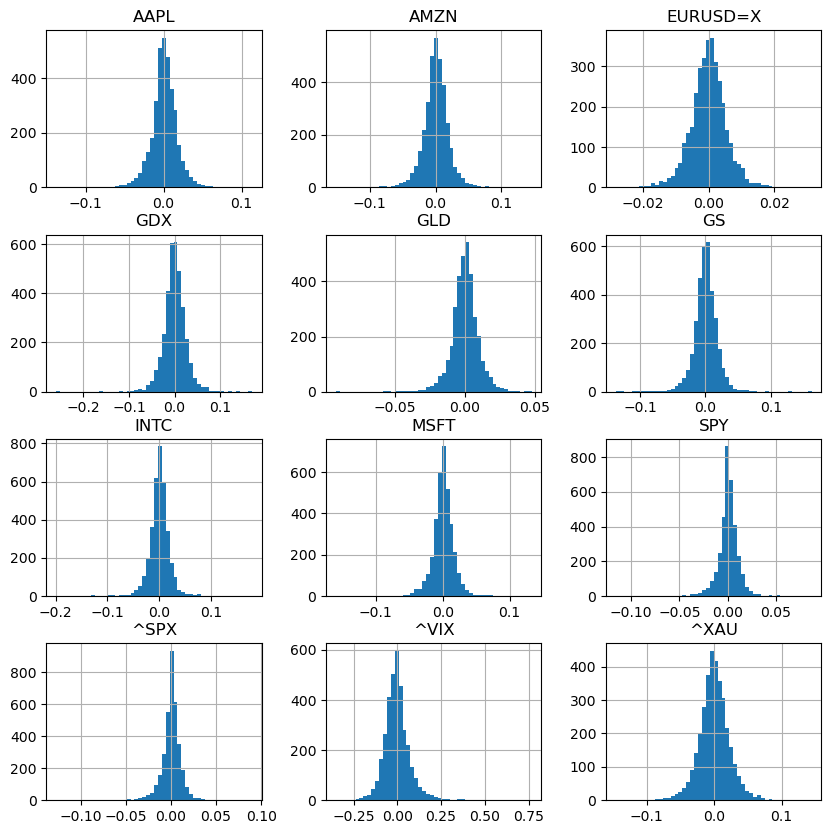

In [16]:
# 히스토그램으로 확인하기
rate_f_df.hist(figsize=(10, 10), bins=50)
plt.show()

In [ ]:
# 각 원소들의 누적합
# 과정별로 저장이 된다
# a_df.cumsum()

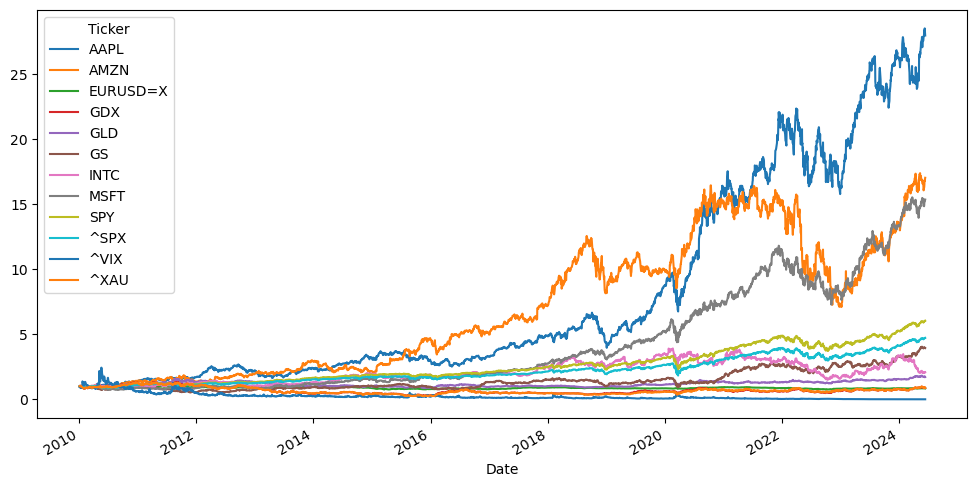

In [17]:
# 일간 수익률 구하기
# 로그했기떄문에 np.exp로 지수로 풀어준다
rate_f_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10868\2506626681.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))


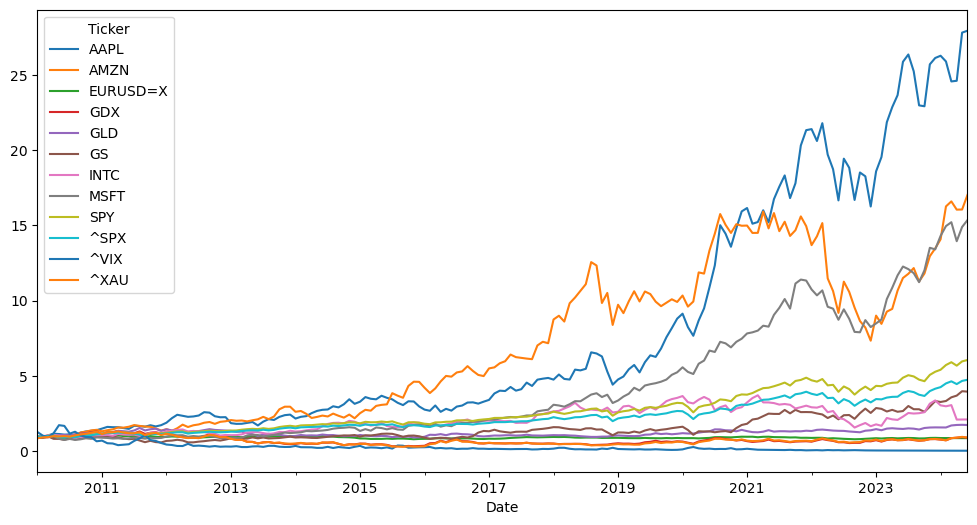

In [18]:
# 월간 수익률 구하기
# resample로 주기를 정할 수있음
rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

In [19]:
# 아마존만
amzn_df = f_df[['AMZN']].dropna()
amzn_df

Ticker,AMZN
Date,
2010-01-04,6.6950
2010-01-05,6.7345
2010-01-06,6.6125
2010-01-07,6.5000
2010-01-08,6.6760
...,...
2024-06-05,181.2800
2024-06-06,185.0000
2024-06-07,184.3000


In [20]:
# 아마존에서 최댓값과 최솟값을 점선으로 구해본다

# 윈도우 크기 지정
window = 20

# 이동평균 후 최솟값 계산
amzn_df['min'] = amzn_df['AMZN'].rolling(window=window).min()
# 이동평균 후 평균값 계산
amzn_df['mean'] = amzn_df['AMZN'].rolling(window=window).mean()
# 이동평균 후 표준편차값 계산
amzn_df['std'] = amzn_df['AMZN'].rolling(window=window).std()
# 이동평균 후 중앙값 계산
amzn_df['median'] = amzn_df['AMZN'].rolling(window=window).median()
# 이동평균 후 최댓값 계산
amzn_df['max'] = amzn_df['AMZN'].rolling(window=window).max()

# Nan 값 제거
amzn_df.dropna()

Ticker,AMZN,min,mean,std,median,max
Date,,,,,,
2010-02-01,5.9435,5.9435,6.349775,0.236046,6.36225,6.7345
2010-02-02,5.9060,5.9060,6.310325,0.241189,6.34400,6.7345
2010-02-03,5.9550,5.9060,6.271350,0.231837,6.31625,6.6760
2010-02-04,5.7970,5.7970,6.230575,0.240240,6.29525,6.6760
2010-02-05,5.8695,5.7970,6.199050,0.244358,6.27975,6.6760
...,...,...,...,...,...,...
2024-06-05,181.2800,176.4400,183.172500,3.507785,183.14000,189.5000
2024-06-06,185.0000,176.4400,183.022500,3.351132,183.14000,189.5000
2024-06-07,184.3000,176.4400,182.762500,3.006078,183.14000,187.4800


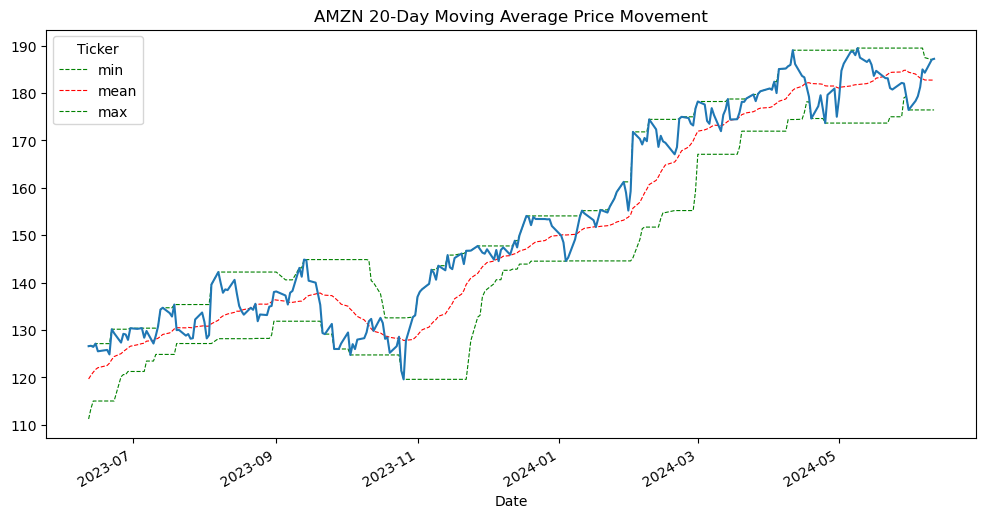

In [21]:
# 1년치만 계산하기
import matplotlib.pyplot as plt
# 최솟값, 평균값, 최댓값의 이동평균 시각화
ax = amzn_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize=(12, 6), style=['g--', 'r--', 'g--'], lw=0.8)
amzn_df['AMZN'].iloc[-252:].plot(ax=ax)
plt.title("AMZN 20-Day Moving Average Price Movement")
plt.show()

In [22]:
# SMA(Simple Moving Average) : 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정
# 롤링을 2번 해야한다, 1년, 1달!
amzn_df['SMA1'] = amzn_df['AMZN'].rolling(window=21).mean() #short-term
amzn_df['SMA2'] = amzn_df['AMZN'].rolling(window=252).mean() #long-term
amzn_df[['AMZN', 'SMA1', 'SMA2']].tail()

Ticker,AMZN,SMA1,SMA2
Date,,,
2024-06-05,181.28,183.438571,152.038452
2024-06-06,185.00,183.259524,152.270159
2024-06-07,184.30,183.083333,152.520437
2024-06-10,187.06,182.967143,152.769683
2024-06-11,187.23,182.955238,153.022857


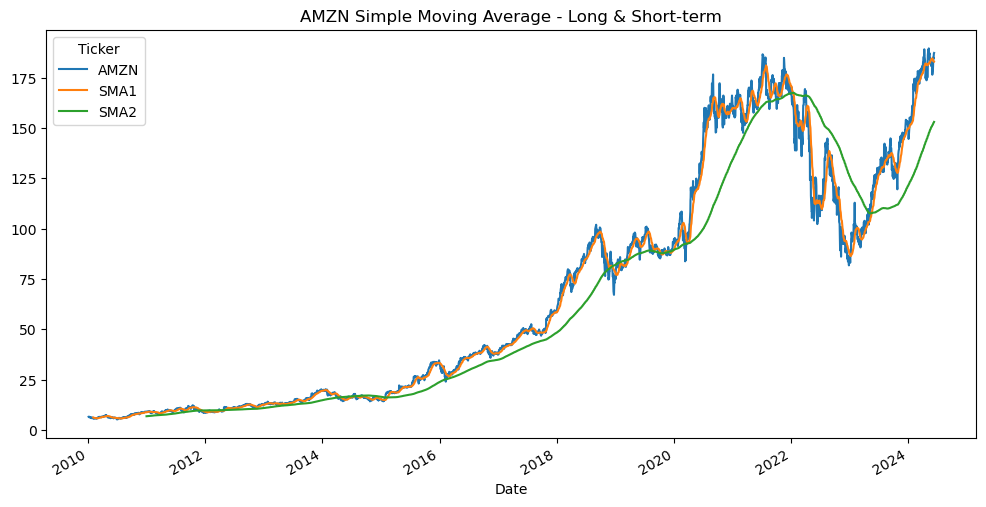

In [23]:
# 숏텀과 롱텀으로 선을 그어 골든크로스와 데드크로스를 구할 수 있다
# 주황선이 녹색선보다 떨어지면 매도를 해야한다 (데드크로스)
# 반대의 경우 골드크로스
amzn_df[['AMZN', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("AMZN Simple Moving Average - Long & Short-term")
plt.show()

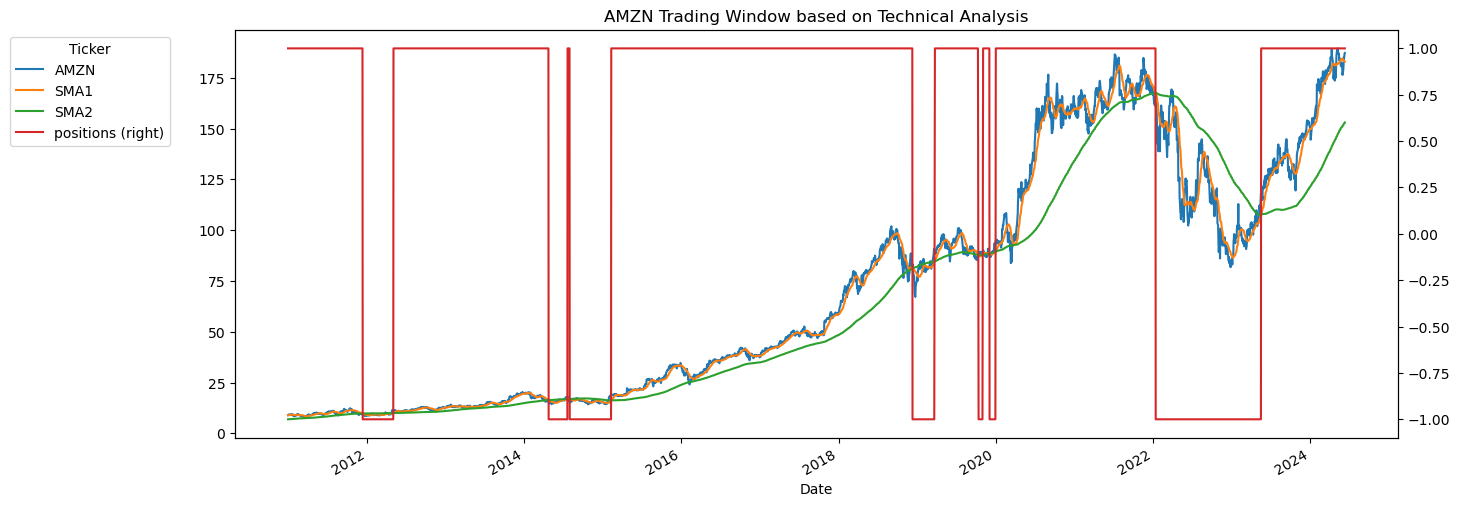

In [24]:
# 아마존 주가 기술 분석
# 골든 크로스, 데드 크로스
amzn_df.dropna(inplace=True)

# 거래 신호 결정 기준 데이터 후 새로운 컬럼으로 추가
# SMA1이 SMA2 보다 크면 1, 작으면 -1
amzn_df['positions'] = np.where(amzn_df['SMA1'] > amzn_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = amzn_df[['AMZN', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("AMZN Trading Window based on Technical Analysis")
plt.show()

# csv 파일 불러오기

In [25]:
import pandas as pd

# index_col 데이트 컬럼을 인덱스로 쓰기
# parse_dates 타입을 바꿔주기 datetimeindex
f_df = pd.read_csv('./datasets/financial_market.csv', index_col='Date', parse_dates=True)

f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [26]:
# pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   --- ------------------------------------ 61.4/614.7 kB 1.7 MB/s eta 0:00:01
   --------- ------------------------------ 143.4/614.7 kB 1.7 MB/s eta 0:00:01
   ----------- ---------------------------- 174.1/614.7 kB 1.5 MB/s eta 0:00:01
   ---------------- ----------------------- 256.0/614.7 kB 1.4 MB/s eta 0:00:01
   ------------------ --------------------- 286.7/614.7 kB 1.4 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/614.7 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/614.7 kB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 481.3/614.7 kB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 563.2/614.7 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- - 593.9/614.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.

In [27]:
import pmdarima as pm

In [28]:
pre_f_df = f_df.dropna()
pre_f_df

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82
2010-01-08,30.28,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.44,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58


In [29]:
# 최근 1년간의 아마존 데이터프레임 생성
amzn_df = pre_f_df[['AMZN.O']].iloc[-252:]
amzn_df

,AMZN.O
Date,
2017-06-30,968.00
2017-07-03,953.66
2017-07-05,971.40
2017-07-06,965.14
2017-07-07,978.76
...,...
2018-06-25,1663.15
2018-06-26,1691.09
2018-06-27,1660.51


In [ ]:
# train, test 로 나눌때 랜덤으로 섞으면 안된다.

In [30]:
# 80% 트레인, 20% 테스트 나누기
y_train = amzn_df['AMZN.O'][:int(0.8 * len(amzn_df))]
y_test = amzn_df['AMZN.O'][int(0.8 * len(amzn_df)):]

<Axes: xlabel='Date'>

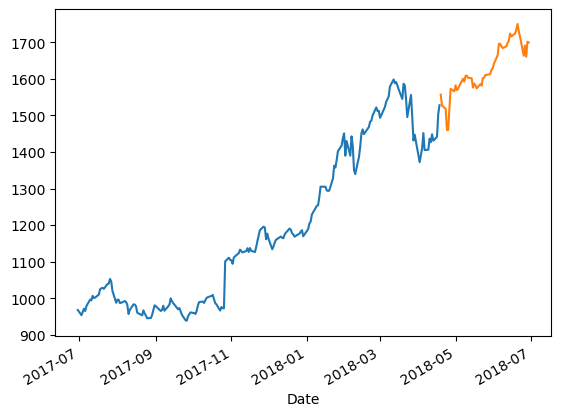

In [31]:
# 시각화
# test와 예측값을 비교하면 된다.
y_train.plot()
y_test.plot()

In [35]:
from pmdarima.arima import ndiffs
# KPSS(Kwaiatkowski-Phillips-Schmidt-Shin)
# 차분을 진행하는 것이 필요할지 결정하기 위해 사용하는 한가지 검정 방법
# 영가설(귀무가설)을 "데이터에 정상성이 나타난다" 로 설정한 뒤
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다.

# 때문에 결과가 0은 차분할 필요가 없음, 그 이외 n 만큼 차분하면 된다.
# alpha: 강도, max_d: 너무 높으면 패턴을 잃어버림
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
pp_diffs = ndiffs(y_train, alpha=0.05, test='pp', max_d=6)

n_diffs = max(kpss_diffs, adf_diffs, pp_diffs)

print(f'd = {n_diffs}')

d = 1


In [36]:
import pmdarima as pm

# d=1 차수 설정
# p와 q의 시작과 끝값을 정해준다. 그 사이에서 가장 적합한 결과를 출력해준다.
# m=1 : 계절성이 없다는 디폴트값 seasonal= False 같이 입력
# 계절성이 있다면 seasonal=True를 주고 m=n n을 입력한다.
# stepwise : d > p > q 순서대로 최적의 결과를 찾아준다
# trace : True로 주면 적합할때마다 출력이된다. 과정을 확인하고싶을때 사용.
model = pm.auto_arima(y=y_train, 
                      d=1, 
                      start_p=0, max_p=10, 
                      start_q=0, max_q=10, 
                      m=1, seasonal=False, 
                      stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1804.108, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1805.964, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1805.951, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1805.382, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1807.837, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.248 seconds


In [37]:
model.fit(y_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [38]:
# summary를 해석할 수 있어야한다

# 예측과 실제 데이터의 차이 : 잔차
# Prob(Q), Prob(H), 잔차의 이분산성을 검사한다. 잔차가 일정한지 검사하는 것. 치우치지 않고 일정한게 좋은 데이터라고 판단한다.

# Prob(Q), 융-박스 검정 통계량
# 영가설: 잔차가 백잭삽음 시계열을 따른다.
# 백색잡음 시계열을 따른다는 말은 0.05 이상: 서로 독립적이고 동일한 분포를 따른다는 말이다. 
# 잡음(노이즈)정도가 분포를 맞춰줄 수 있을만큼 일반화 되어있는 정도라는 뜻.

# Prob(H), 이분산성 검정 통계량
# 영가설: 잔차가 이분산성을 띠지 않는다.
# 0.05 이상: 잔차의 분산이 일정하다.

# Prob(JB), 자크-베라 검정 통계량
# 영가설: 잔차가 정규성을 따른다. (정규화랑 표준화는 다름)
# 얼마나 안정성이 있는가?
# 0.05 이상: 일정한 평균과 분산을 따른다.

# Skew(쏠린 정도, 왜도)
# 0에 가까워야한다.

# Kurtosis(뾰족한 정도, 첨도)
# 3에 가까워야한다.

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  201
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -900.054
Date:                Wed, 12 Jun 2024   AIC                           1804.108
Time:                        10:01:42   BIC                           1810.705
Sample:                             0   HQIC                          1806.777
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.7992      1.552      1.804      0.071      -0.243       5.841
sigma2       474.6903     22.900     20.729      0.000     429.807     519.573
Ljung-Box (L1) (Q):                   0.15   Jarque-

In [ ]:
# Prob(Q) : 0.70 : 백색잡음 시계열에 가깝다. 아리마 모델에 들어가기 적절하다. 

# Prob(H) : 0.00 : 분산이 일정하지 않다고 판단. 하이리스크, 하이리턴의 상태. 어느 한쪽에서 오차가 크게 날 수 있다.

# Prob(JB) : 0.00

# Skew : 0.36 : 0에 가깝다

# Kurtosis : 9.72 : 많이 뾰족하다

# 포폴시 세가지 종목을 분석했을 때 세개 다 통과하지 않는 경우 이는 지속적으로 동일한 수익률이 나타나기는 어렵습니다. 라고 말할 줄 알아야한다.
# 세가지 다 통과한다면 그건 안정성있는 금융 데이터일 가능성 ↑

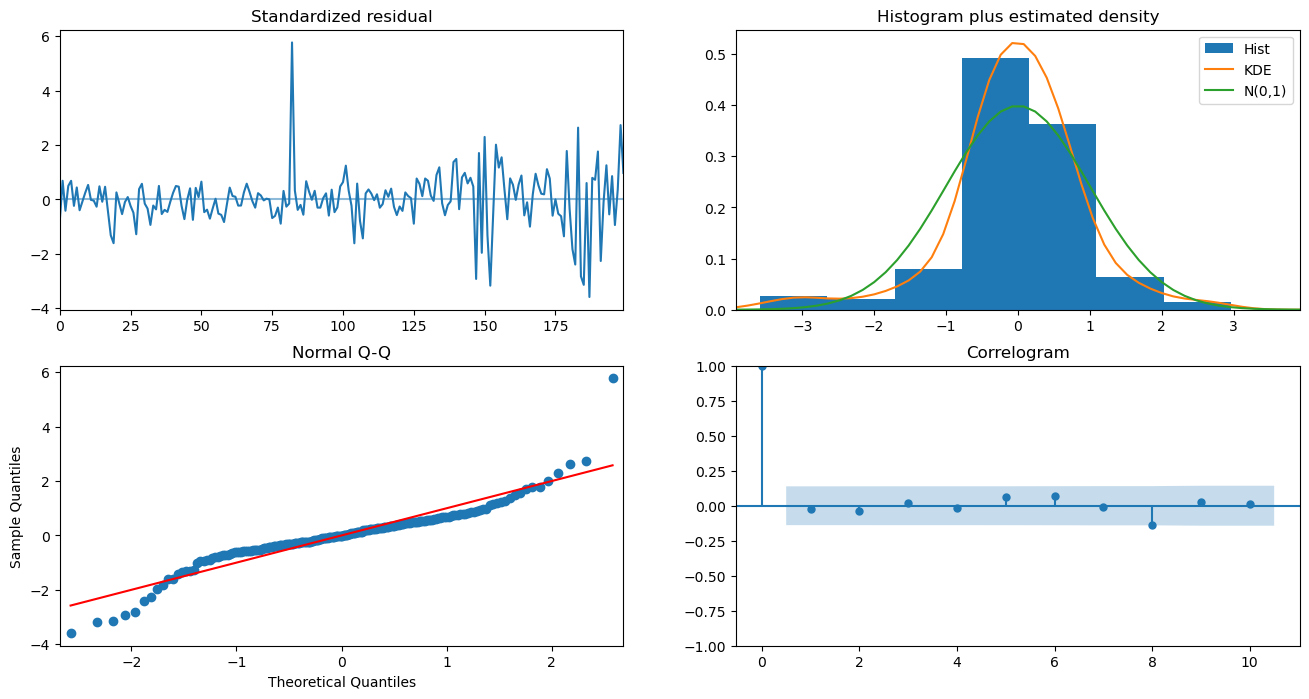

In [39]:
# summary 결과를 시각화
import matplotlib.pyplot as plt

model.plot_diagnostics(figsize=(16,8))
plt.show()

In [40]:
# predict
prediction = model.predict(n_periods=len(y_test))
prediction

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


201    1530.6392
202    1533.4384
203    1536.2376
204    1539.0368
205    1541.8360
206    1544.6352
207    1547.4344
208    1550.2336
209    1553.0328
210    1555.8320
211    1558.6312
212    1561.4304
213    1564.2296
214    1567.0288
215    1569.8280
216    1572.6272
217    1575.4264
218    1578.2256
219    1581.0248
220    1583.8240
221    1586.6232
222    1589.4224
223    1592.2216
224    1595.0208
225    1597.8200
226    1600.6192
227    1603.4184
228    1606.2176
229    1609.0168
230    1611.8160
231    1614.6152
232    1617.4144
233    1620.2136
234    1623.0128
235    1625.8120
236    1628.6112
237    1631.4104
238    1634.2096
239    1637.0088
240    1639.8080
241    1642.6072
242    1645.4064
243    1648.2056
244    1651.0048
245    1653.8040
246    1656.6032
247    1659.4024
248    1662.2016
249    1665.0008
250    1667.8000
251    1670.5992
dtype: float64

In [ ]:
# 하나를 예측하고 fit, 또 하나를 예측하고 fit 해야한다.

In [ ]:
# return conf int=True : 신뢰구간(범위)까지 predict. 신뢰구간의 정 가운데값, 평균값으로 예측값을 낸다.
# 신뢰구간을 평균낸게 예측값, 잔차의 평균이 일정해짐 = 이 머신러닝의 알고리즘

In [ ]:
prediction.tolist()

In [ ]:
# 함수 생성
def predict_one_step():
    prediction, conf_int
    # 예측은 반드시 한발자국씩 가야한다 n_periods=1
    return
    # 그 결과를 리스트로 리턴 (신뢰구간이 2차원이기 때문에 0번째 방의 값을 가져온다) return .tolist()[0]

In [ ]:
preds = []
p_list = []

In [ ]:
# 데이터프레임 생성
y_predict_df = pd.DataFrame({"test": y_test, "pred": p_list})
y_predict_df

In [ ]:
# 실제 데이터와 얼만큼 차이가 나는지 그래프로 시각화
# 녹색 : 예측
# 주황색 : 실제

In [ ]:
# MAPE로 평가하기
# 함수 생성
def MAPE(y_test, y_pred):
    return

# 오차 퍼센트를 출력
print()

In [ ]:
# 기존에 내가 가지고 있던 데이터를 모델이 얼마나 잘 예측하는지까지가 머신러닝의 한계이다.
# 이후를 예측하고싶다면 딥러닝이 필요.
# 다만 이후를 예측하기 위해서는 머신러닝까지의 이해가 필요하다.